# Understanding Decision Boundaries in Machine Learning

Decision boundaries are a fundamental concept in classification problems. They represent the regions in the feature space where a classifier changes its prediction from one class to another. Understanding decision boundaries is crucial for interpreting how different classifiers work and when to use them.

## Types of Decision Boundaries

### 1. Linear Decision Boundaries

Linear decision boundaries are straight lines (in 2D), planes (in 3D), or hyperplanes (in higher dimensions) that separate different classes. Classifiers that produce linear decision boundaries include:

- Logistic Regression
- Linear Support Vector Machines (SVM)
- Perceptrons

Linear boundaries are simple and often work well for linearly separable data. However, they can struggle with more complex, non-linear relationships in the data.

### 2. Non-Linear Decision Boundaries

Non-linear decision boundaries can take various shapes and are not restricted to straight lines or planes. They can be:

- Continuous curves or surfaces
- Discontinuous regions

Classifiers that can produce non-linear decision boundaries include:

- Non-linear SVMs (with kernels)
- Decision Trees and Random Forests
- k-Nearest Neighbors (k-NN)
- Neural Networks

Non-linear boundaries can capture more complex relationships in the data but may be prone to overfitting if not properly regularized.

## Visualizing Decision Boundaries

Let's use Python to visualize decision boundaries for different classifiers. We'll use the `make_moons` function from sklearn to generate non-linearly separable data and compare how different classifiers perform.


/home/codespace/.local/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


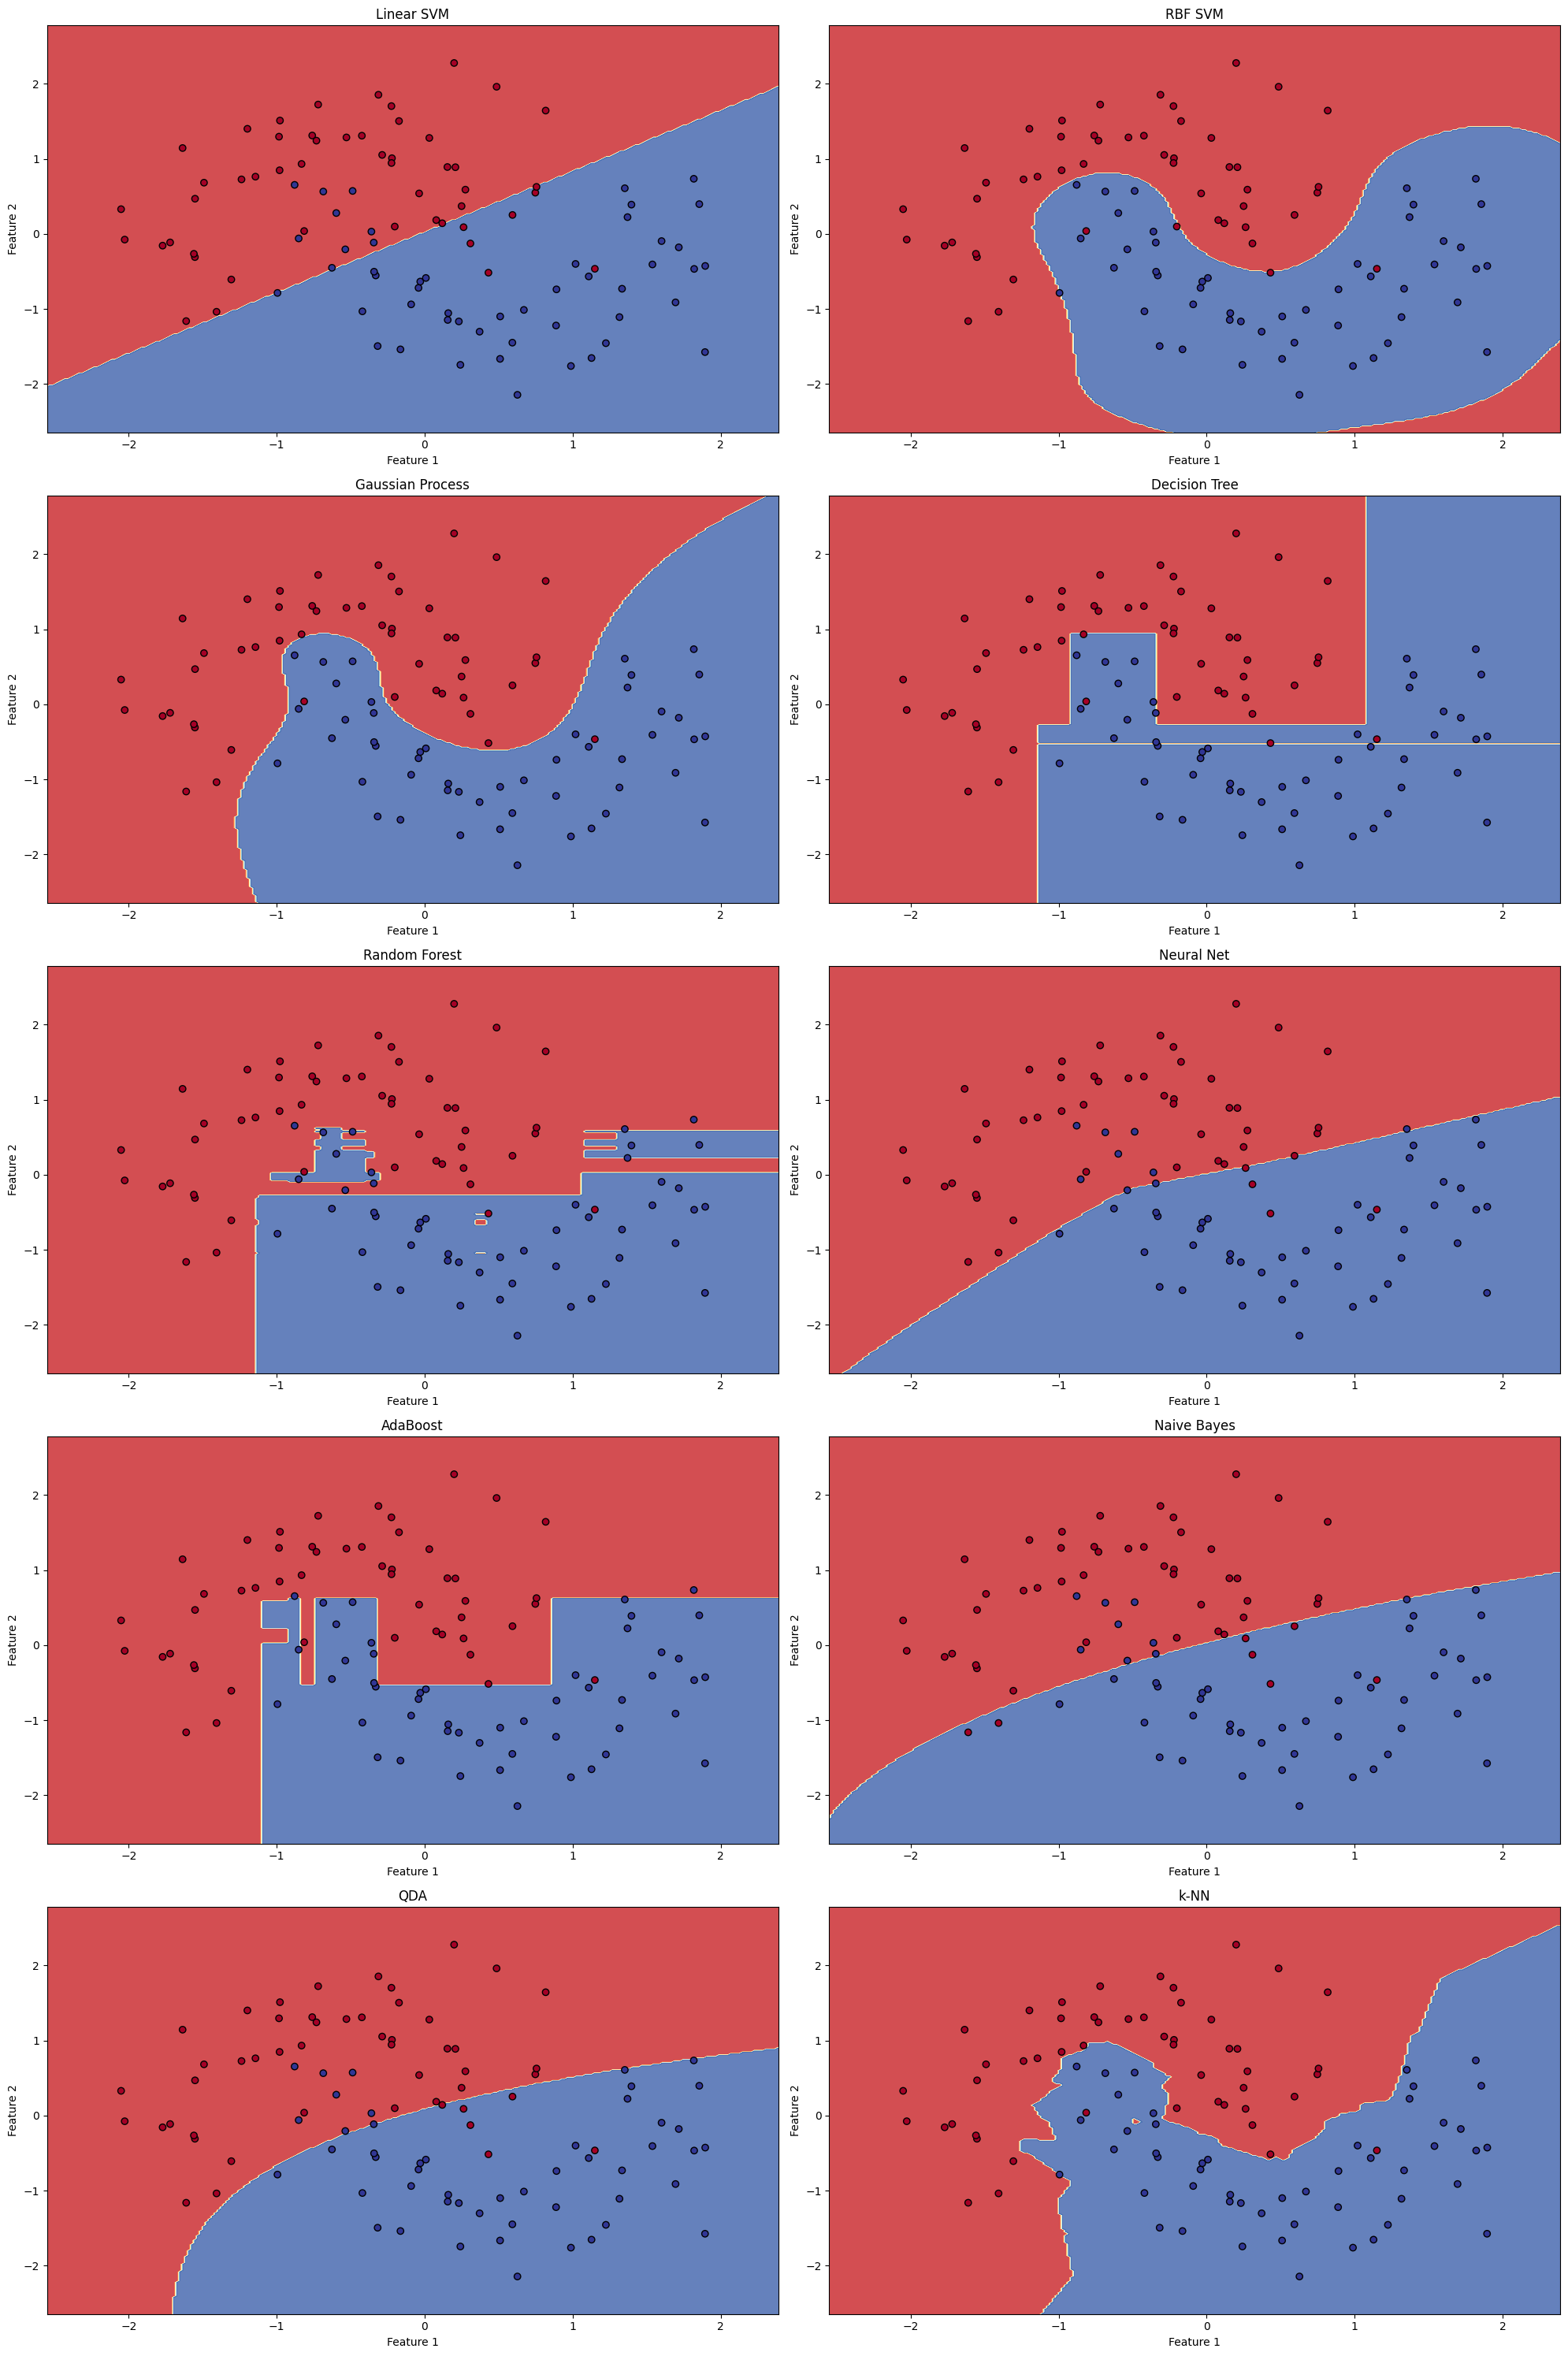

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

def plot_decision_boundary(ax, clf, X, y, title):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.8)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolor='black')
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")
    ax.set_title(title)

# Generate datasets
X, y = make_moons(noise=0.3, random_state=0)
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)

# Create and train classifiers
classifiers = [
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    KNeighborsClassifier(3)
]

titles = [
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
    "k-NN"
]

# Plot decision boundaries
fig, axs = plt.subplots(5, 2, figsize=(20, 30))
axs = axs.ravel()  # Flatten the 2D array of axes

for ax, clf, title in zip(axs, classifiers, titles):
    clf.fit(X_train, y_train)
    plot_decision_boundary(ax, clf, X, y, title)

# Remove any unused subplots
for ax in axs[len(classifiers):]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()

## Analyzing the Results

1. **Linear SVM**: You'll notice that the linear SVM struggles with this non-linear data, creating a straight line that doesn't capture the moon shapes well.

2. **RBF SVM**: The RBF (Radial Basis Function) kernel allows the SVM to create a non-linear boundary that fits the data much better.

3. **Decision Tree**: The decision tree creates a "staircase" boundary, with horizontal and vertical lines. This can approximate non-linear boundaries but may not be smooth.

4. **Random Forest**: By combining multiple decision trees, the random forest creates a smoother, more nuanced boundary.

5. **Neural Network**: The neural network can create complex, non-linear boundaries that fit the data well.

6. **k-NN**: The k-Nearest Neighbors algorithm creates a boundary that's highly dependent on local data points, resulting in a complex, potentially discontinuous boundary.

## Limitations and Considerations

1. **Overfitting**: Very complex, non-linear boundaries (like those from k-NN or deep neural networks) can overfit the training data, leading to poor generalization.

2. **Underfitting**: Simple, linear boundaries may underfit complex data, missing important patterns.

3. **Interpretability**: Linear boundaries are often more interpretable than complex, non-linear ones.

4. **Computational Complexity**: Creating non-linear boundaries (especially with methods like SVM with kernels or deep neural networks) can be computationally expensive.

## Example: Linear Data with Non-Linear Classifier

Let's see what happens when we use a non-linear classifier (Decision Tree) on clearly linear data:

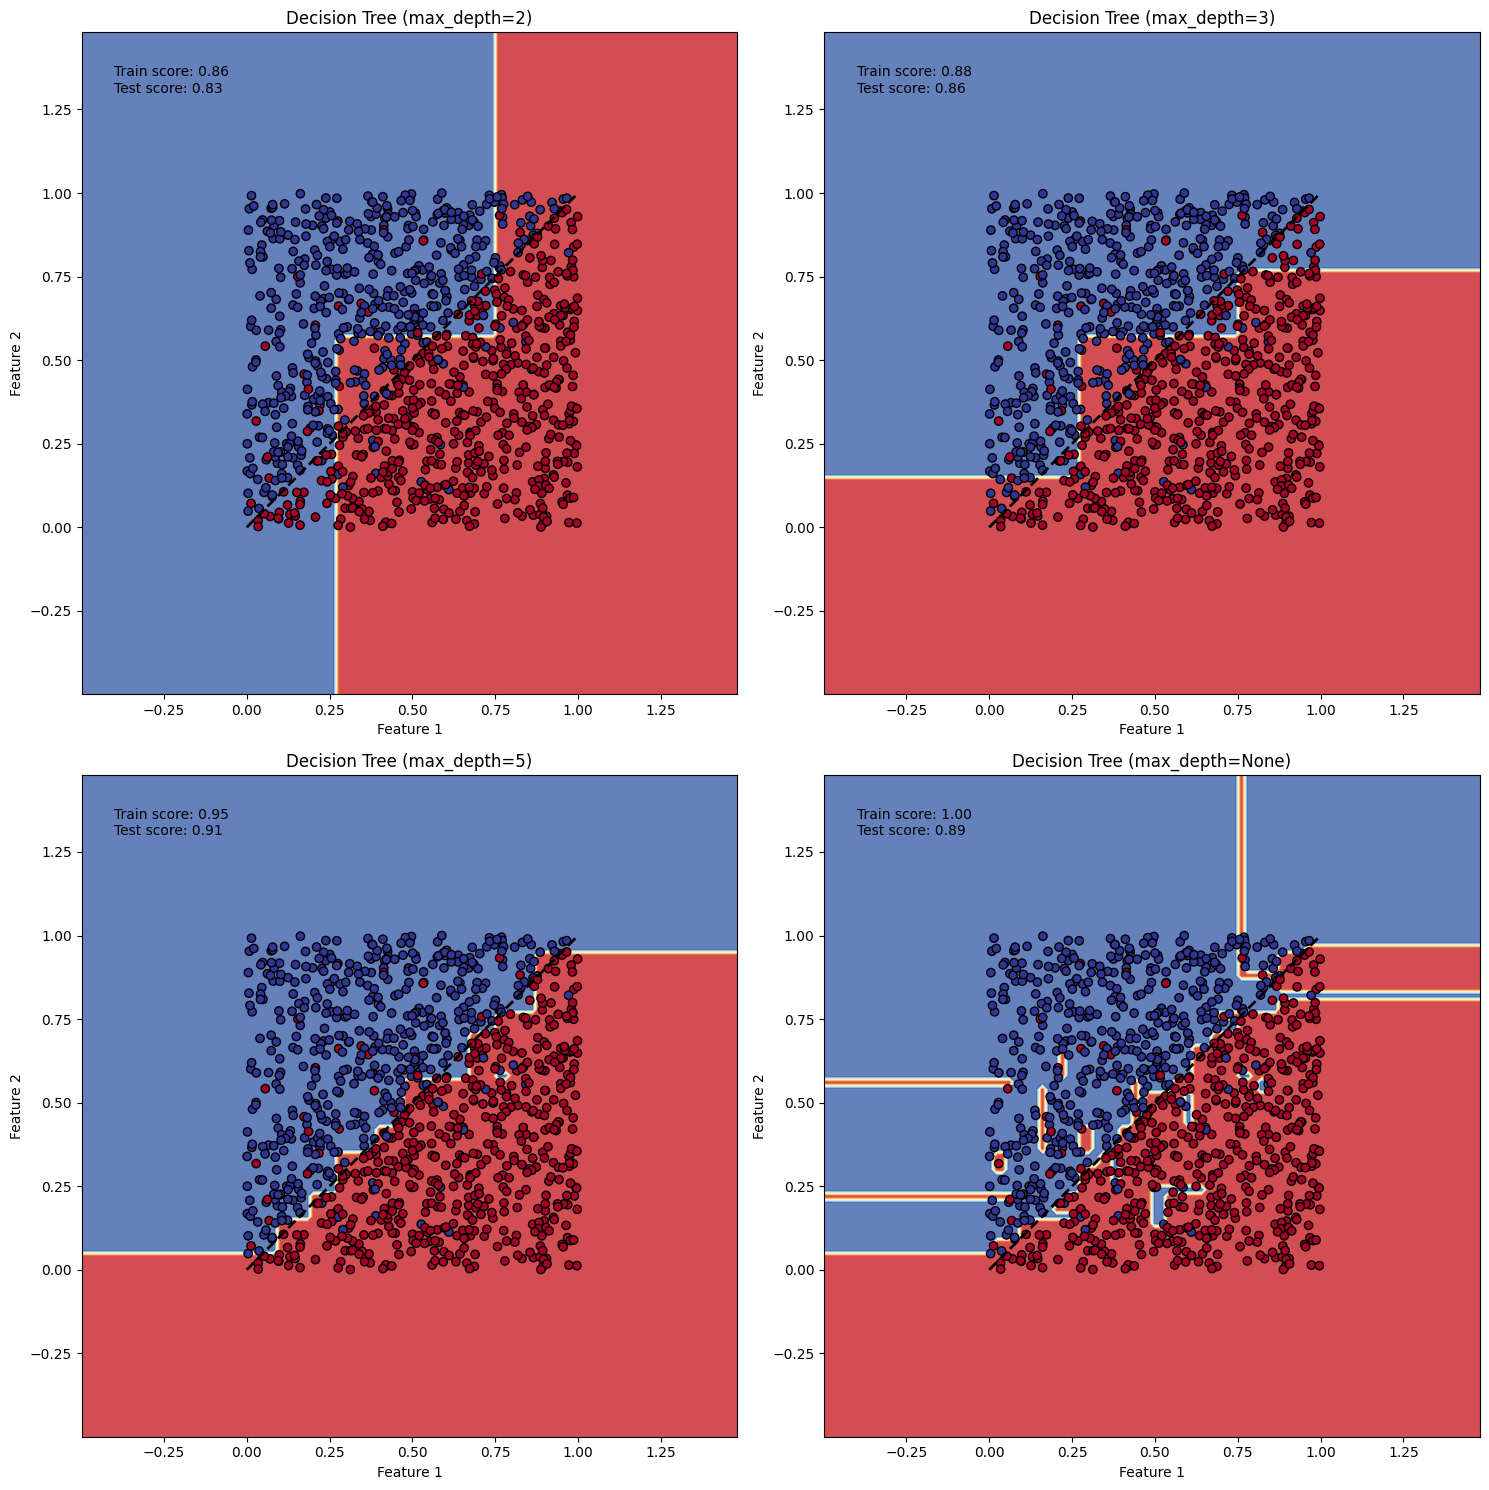


Feature importances (max_depth=2):
Feature 1: 0.5546
Feature 2: 0.4454

Feature importances (max_depth=3):
Feature 1: 0.4858
Feature 2: 0.5142

Feature importances (max_depth=5):
Feature 1: 0.5070
Feature 2: 0.4930

Feature importances (max_depth=None):
Feature 1: 0.5199
Feature 2: 0.4801


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Generate data with a diagonal decision boundary
def generate_diagonal_data(n_samples=1000, noise=0.1):
    X = np.random.rand(n_samples, 2)
    y = (X[:, 1] > X[:, 0]).astype(int)
    
    # Add some noise
    flip_indices = np.random.choice(n_samples, size=int(noise * n_samples), replace=False)
    y[flip_indices] = 1 - y[flip_indices]
    
    return X, y

# Plot decision boundary
def plot_decision_boundary(ax, clf, X, y, title):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.8)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolor='black')
    ax.plot([0, 1], [0, 1], 'k--', lw=2)  # Plot the true decision boundary
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")
    ax.set_title(title)

# Generate data
X, y = generate_diagonal_data(n_samples=1000, noise=0.05)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train classifiers with different max_depth
max_depths = [2, 3, 5, None]
classifiers = [DecisionTreeClassifier(max_depth=depth, random_state=42) for depth in max_depths]

# Plot decision boundaries
fig, axs = plt.subplots(2, 2, figsize=(15, 15))
axs = axs.ravel()

for ax, clf, depth in zip(axs, classifiers, max_depths):
    clf.fit(X_train, y_train)
    plot_decision_boundary(ax, clf, X, y, f"Decision Tree (max_depth={depth})")
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    ax.text(0.05, 0.95, f"Train score: {train_score:.2f}\nTest score: {test_score:.2f}", 
            transform=ax.transAxes, va='top')

plt.tight_layout()
plt.show()

# Print feature importances
for depth, clf in zip(max_depths, classifiers):
    print(f"\nFeature importances (max_depth={depth}):")
    for i, importance in enumerate(clf.feature_importances_):
        print(f"Feature {i+1}: {importance:.4f}")

In this case, you'll see that the Decision Tree creates a "staircase" boundary even though the data is linearly separable. This demonstrates how some non-linear classifiers might struggle to generalize simple linear patterns efficiently.

## Conclusion

Understanding decision boundaries is crucial for selecting and interpreting machine learning models. While linear boundaries are simple and interpretable, they may not capture complex relationships in the data. Non-linear boundaries can model more complex patterns but risk overfitting and may be less interpretable. The choice of classifier and resulting decision boundary should be based on the nature of your data, the complexity of the problem, and the trade-offs between model performance, interpretability, and computational resources.